# K-Nearest Neighbour (KNN) Assignment

In [82]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1. Glass Dataset

In [83]:
glass = pd.read_csv("D:\\DATA SCIENCE ASSIGNMENTS\\KNN\\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [84]:
glass.shape

(214, 10)

In [85]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [86]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [87]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### Visualization

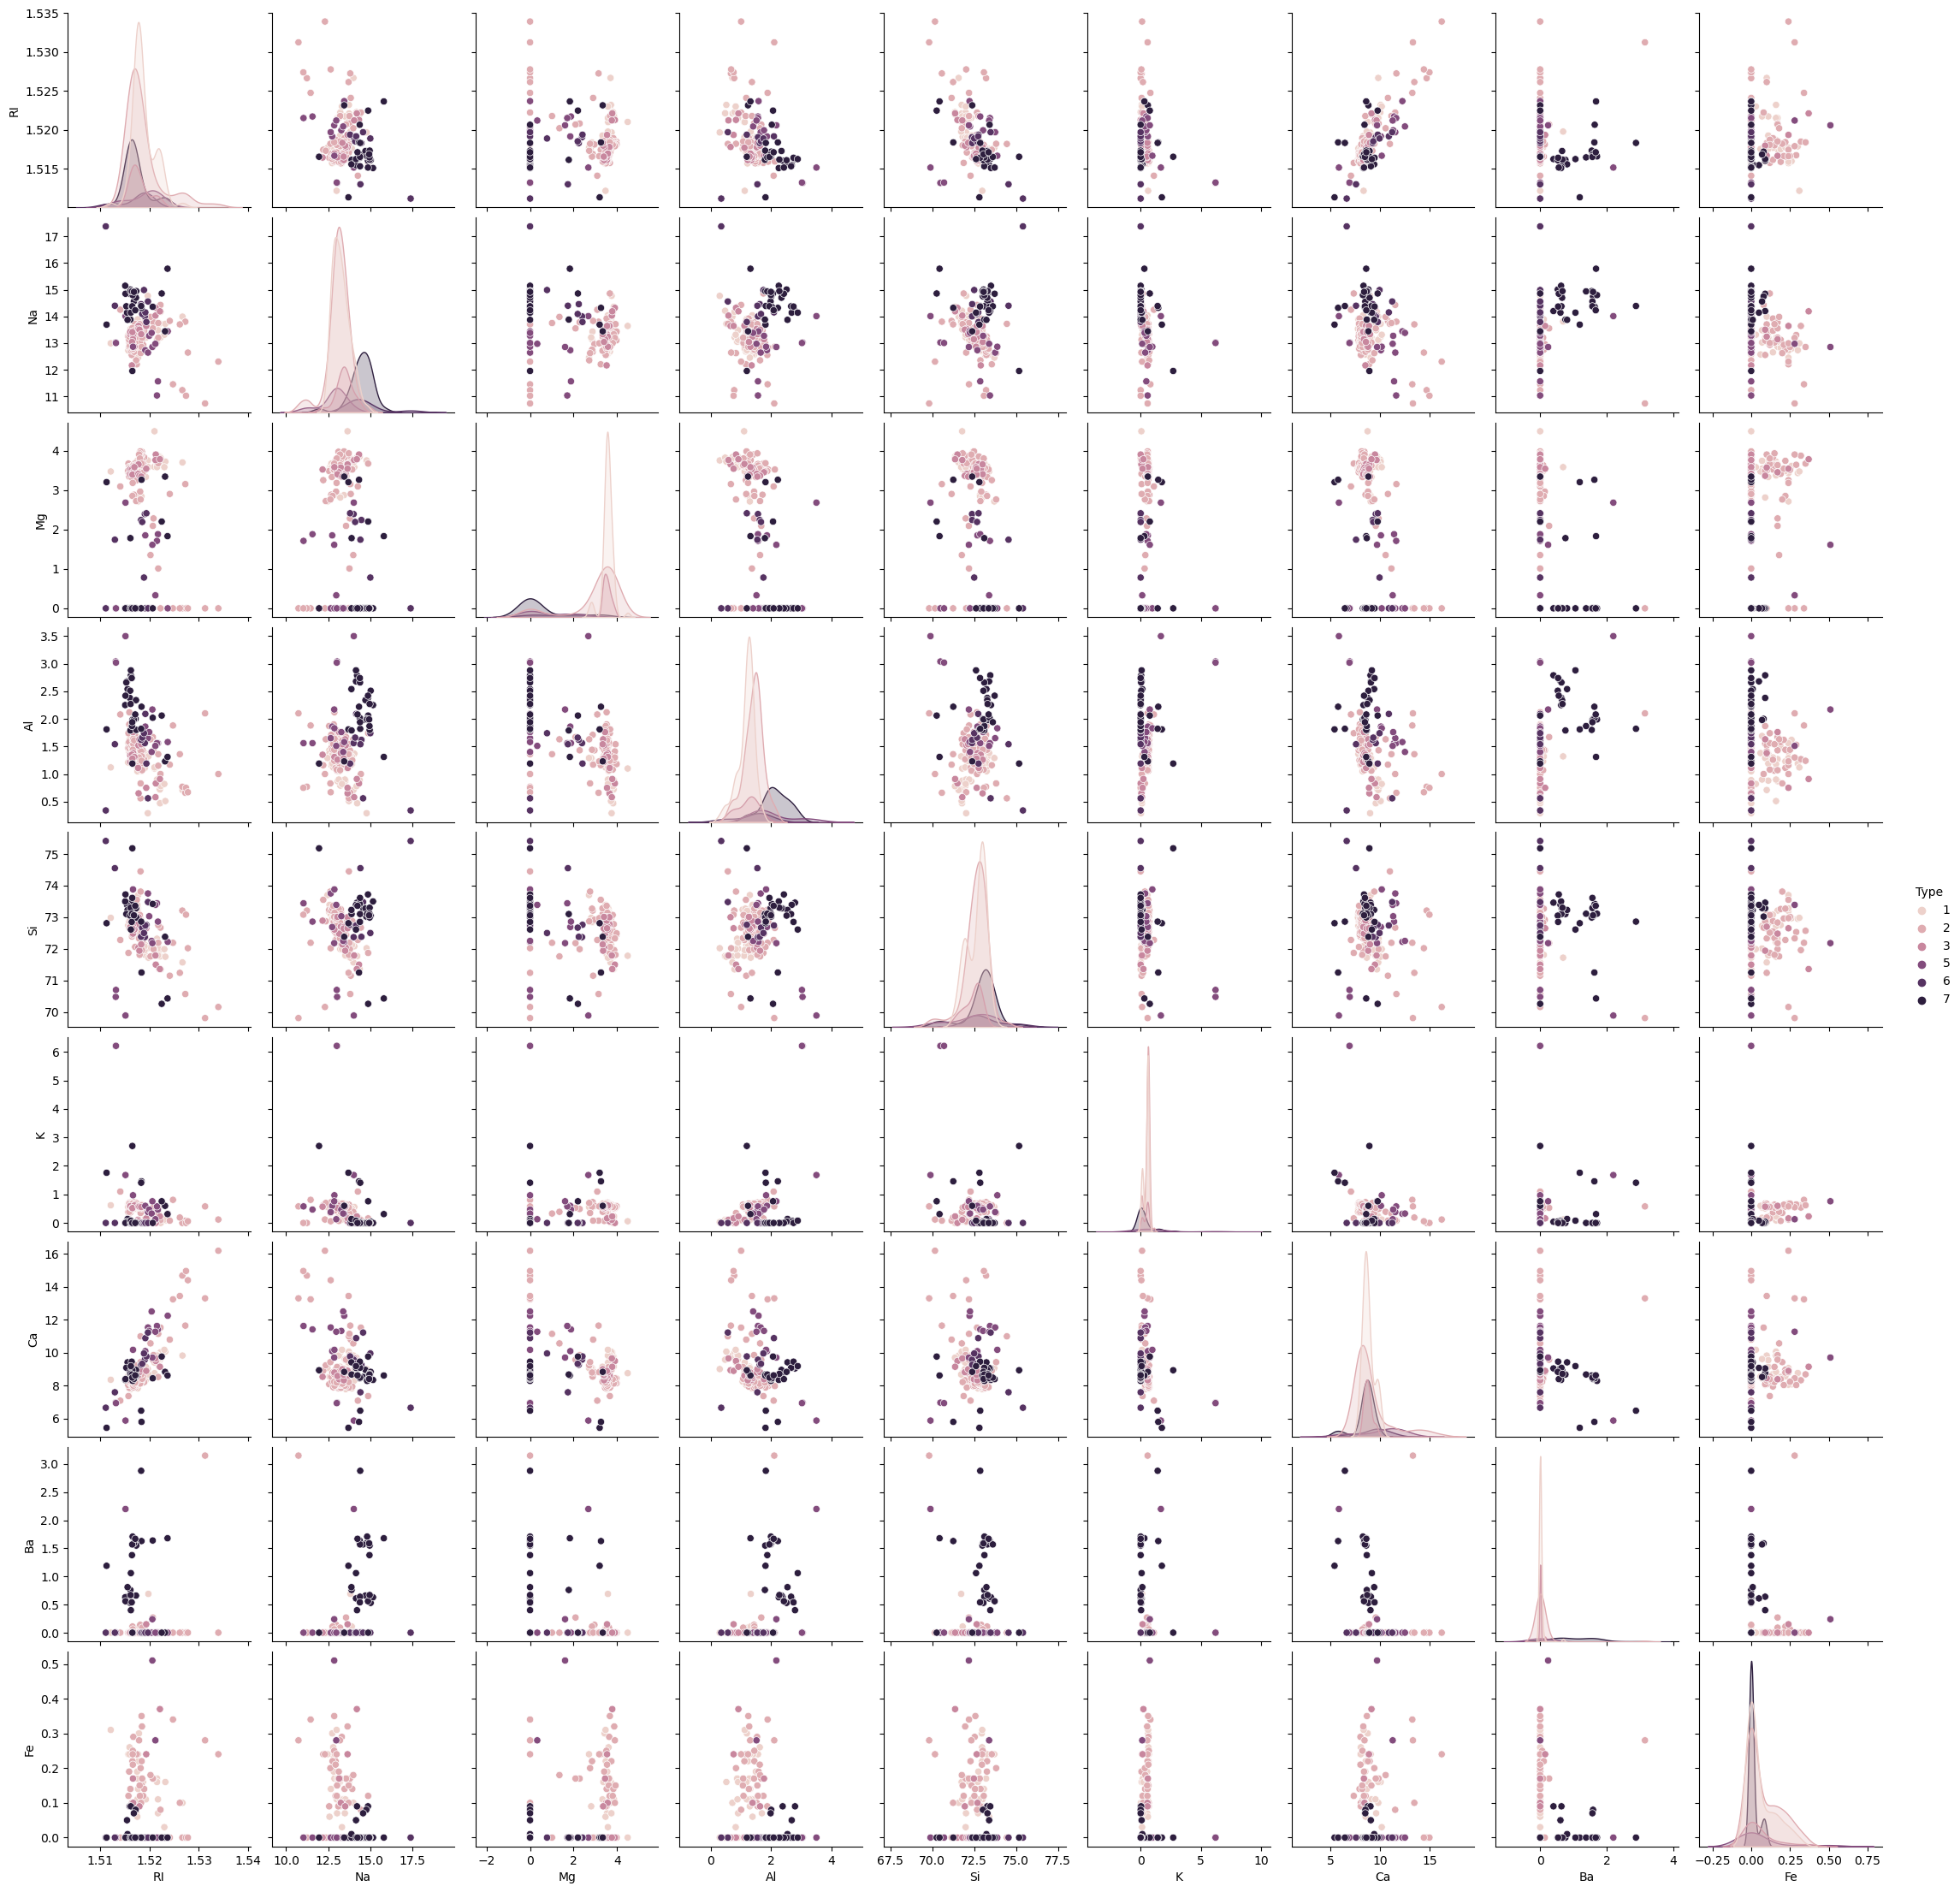

In [88]:
sns.pairplot(glass, hue='Type')

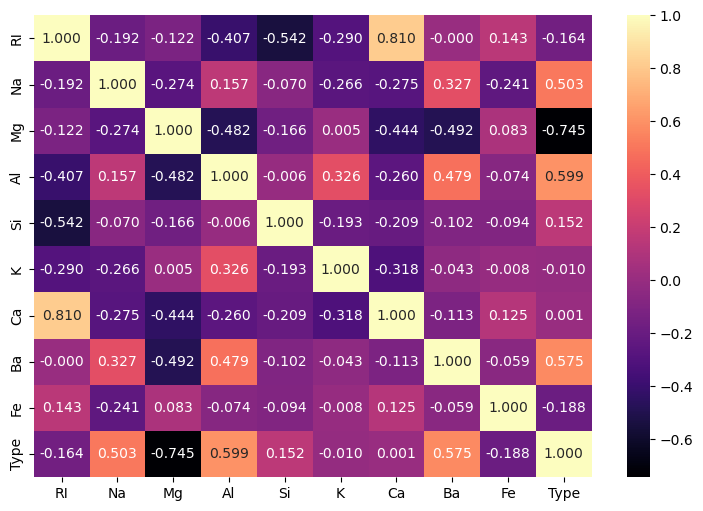

In [89]:
plt.figure(figsize = (9, 6));
sns.heatmap(glass.corr(), cmap='magma', annot=True, fmt='.3f')
plt.show()

In [90]:
#As seen in the above graph, there is a high correlation exists between some of the variables. We can use PCA to reduce the hight correlated variables

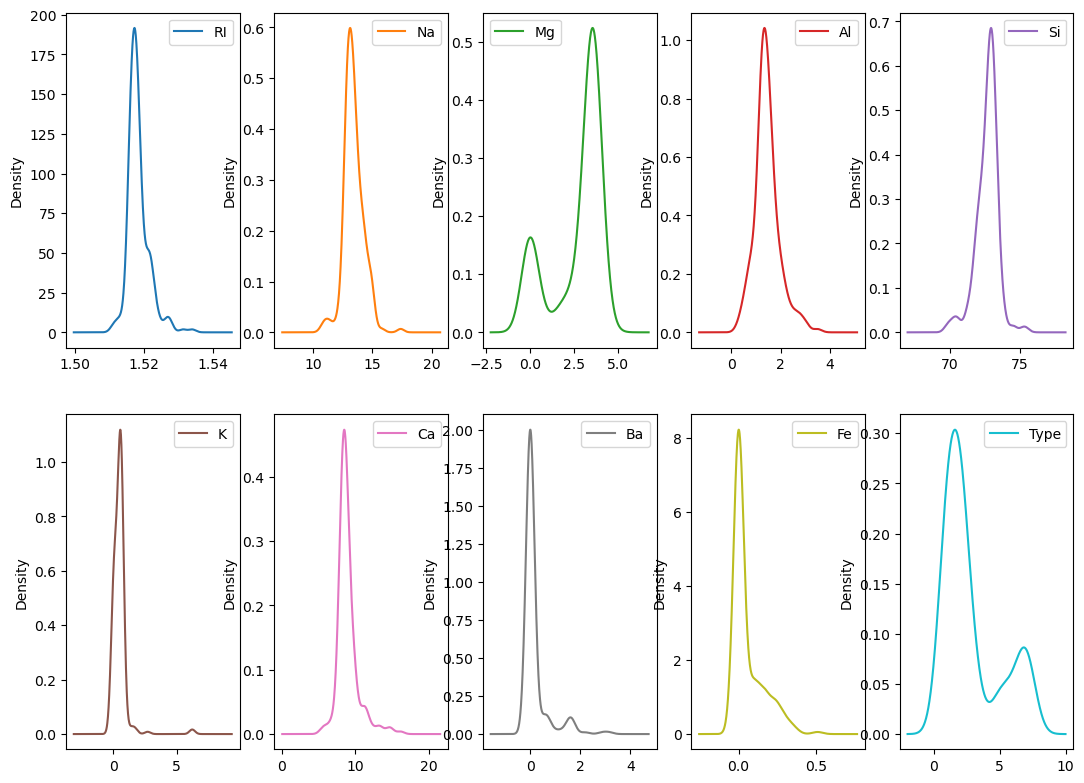

In [91]:
glass.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

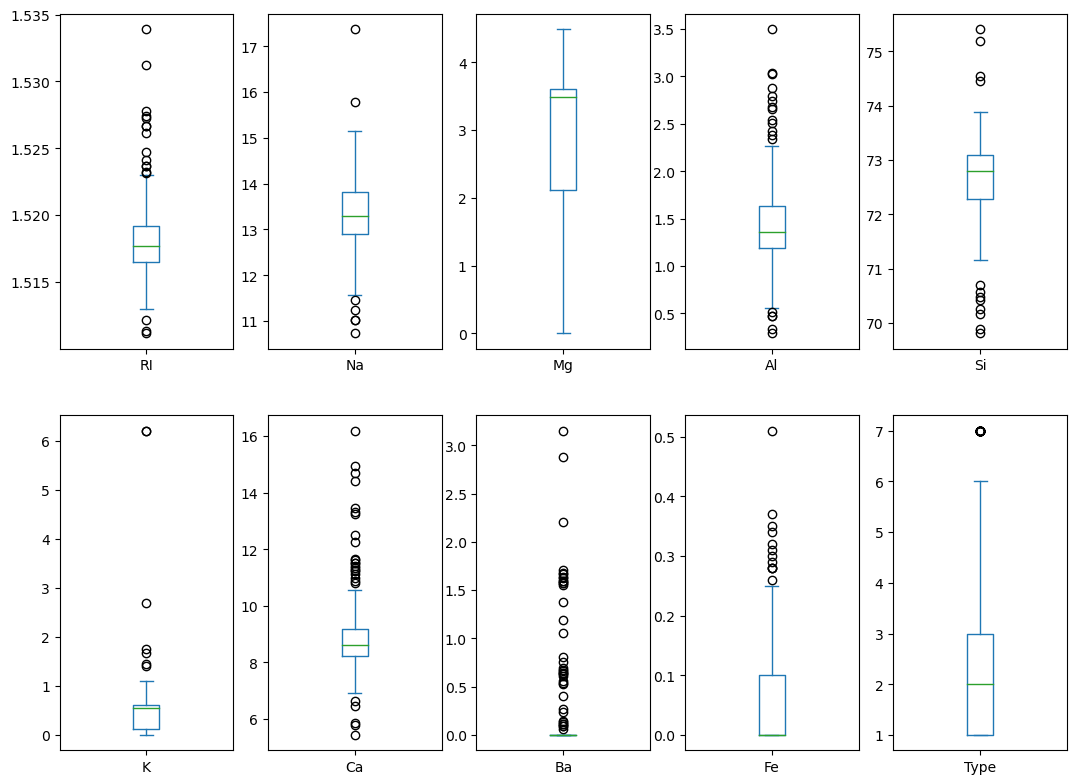

In [92]:
#box plot
glass.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

### KNN Model Building

In [93]:
X = glass.iloc[:, 0:9]
Y = glass.iloc[:, -1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [94]:
#Finding optimal number of K

In [97]:
X = np.array(glass.iloc[:,3:5])
y = np.array(glass['Type'])

In [99]:
model = KNeighborsClassifier(n_neighbors = 12)

In [100]:
model.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [101]:
kfold = KFold(n_splits=8)
results = cross_val_score(model, X, Y, cv = kfold)

In [102]:
results

array([0.55555556, 0.77777778, 0.7037037 , 0.33333333, 0.40740741,
       0.22222222, 0.        , 0.        ])

In [103]:
results.mean()

0.375

In [107]:
model.predict([[1.51651,14.38]])

array([2], dtype=int64)

### Grid Search for Algorithm Tuning

In [108]:
n_neighbors = list(range(1,33))
parameters = {'n_neighbors' : n_neighbors}

In [109]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [110]:
print(grid.best_score_)
print(grid.best_params_)

0.5655592469545958
{'n_neighbors': 18}


### Visualizing the CV results

In [111]:
k_range = range(1, 57)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

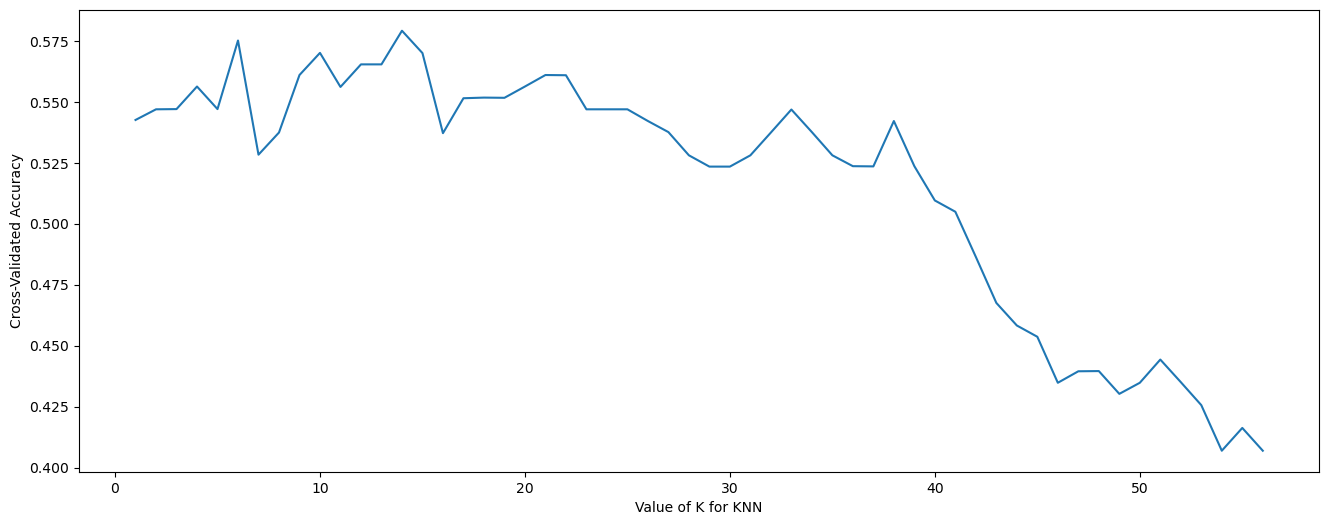

In [112]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [113]:
k_scores

[0.5425401816911251,
 0.5469077568134172,
 0.546995108315863,
 0.5562543675751223,
 0.5469951083158631,
 0.5751222921034241,
 0.5283018867924528,
 0.5373864430468204,
 0.5609713487071977,
 0.5700559049615653,
 0.5560796645702306,
 0.5653389238294898,
 0.5653389238294898,
 0.579140461215933,
 0.5699685534591195,
 0.5371243885394829,
 0.551450034940601,
 0.5517120894479385,
 0.5516247379454926,
 0.5562543675751224,
 0.5609713487071978,
 0.5608839972047519,
 0.5469077568134172,
 0.5469077568134172,
 0.5469077568134172,
 0.5421034241788958,
 0.5375611460517121,
 0.5280398322851153,
 0.5234102026554857,
 0.5234102026554857,
 0.5280398322851153,
 0.5373864430468204,
 0.5468204053109713,
 0.5375611460517121,
 0.5280398322851153,
 0.5235849056603773,
 0.5234975541579315,
 0.5421034241788958,
 0.5235849056603773,
 0.5095213137665967,
 0.5048916841369672,
 0.48637316561844857,
 0.4675052410901468,
 0.4582459818308875,
 0.45361635220125784,
 0.43474842767295596,
 0.4394654088050315,
 0.4395527603

In [114]:
glass_accuracy = pd.DataFrame({'Value of k' : range(1,57),
                            'Accuracy' : k_scores})
glass_accuracy

,Value of k,Accuracy
0,1,0.542540
1,2,0.546908
2,3,0.546995
3,4,0.556254
4,5,0.546995
5,6,0.575122
6,7,0.528302
7,8,0.537386
8,9,0.560971
9,10,0.570056


In [115]:
glass_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
13,14,0.579140
5,6,0.575122
9,10,0.570056
14,15,0.569969
11,12,0.565339
12,13,0.565339
20,21,0.560971
8,9,0.560971
21,22,0.560884
19,20,0.556254


## 2. Zoo Dataset

In [116]:
zoo = pd.read_csv("D:\\DATA SCIENCE ASSIGNMENTS\\KNN\\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [117]:
zoo.shape

(101, 18)

In [118]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [119]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [120]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [152]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [153]:
zu=zoo['animal name'].astype('category')
zu.unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']>

In [154]:
zu=zoo['animal name'].astype('category')
zu.unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: category
Categories (100, object): ['aardvark', 'antelope', 'bass', 'bear', ..., 'wasp', 'wolf', 'worm', 'wren']>

### Visualization

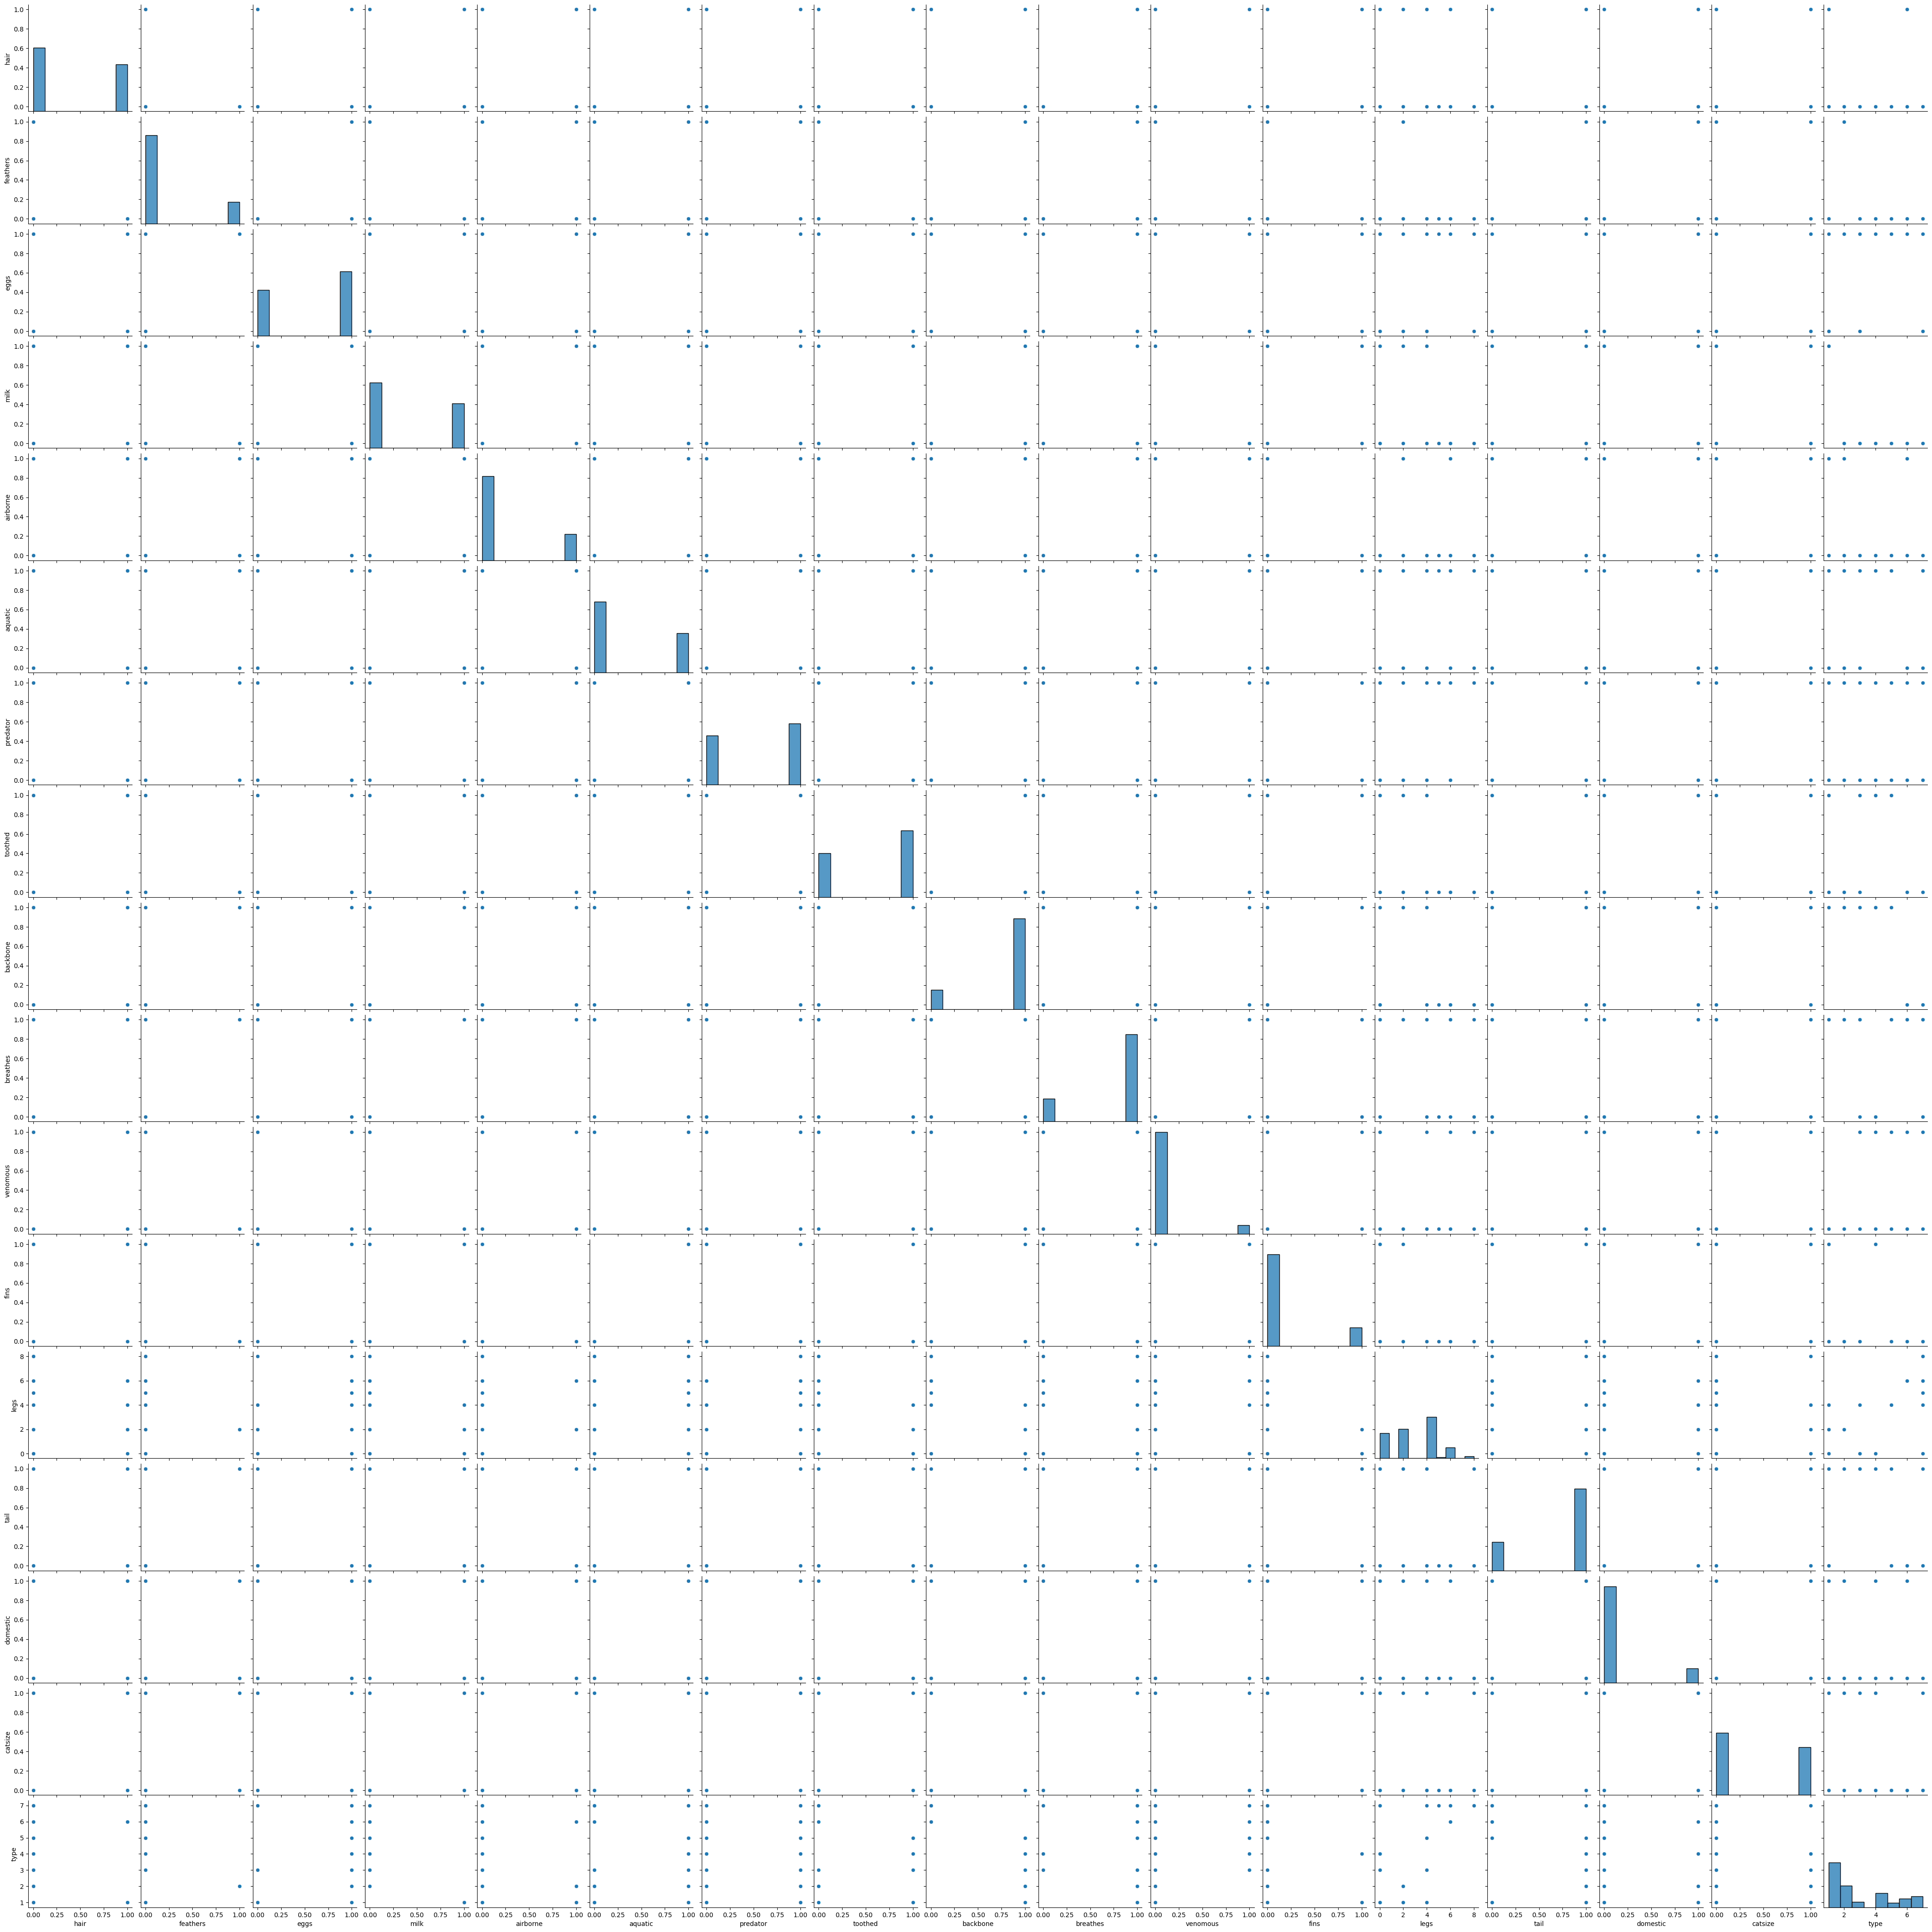

In [155]:
sns.pairplot(zoo)

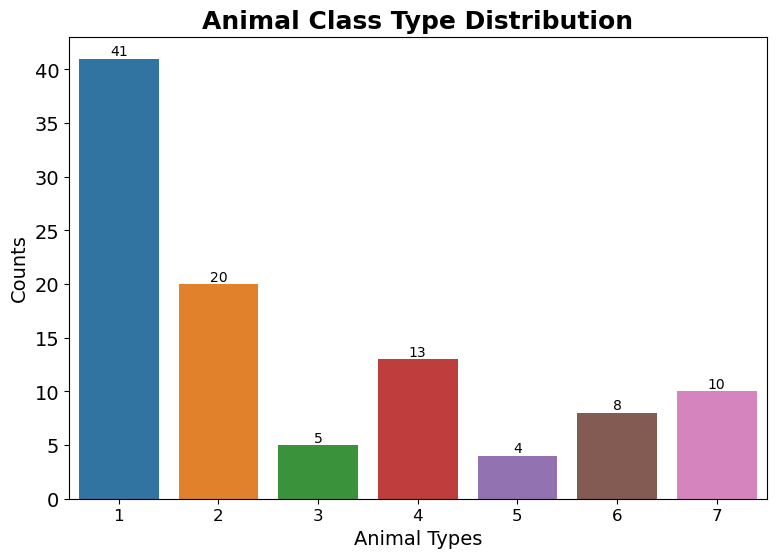

In [156]:
plt.figure(figsize = (9,6))
ax = sns.barplot(x = zoo['type'].value_counts().index.tolist(), y = zoo['type'].value_counts().tolist())
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
for i in ax.containers:
    ax.bar_label(i,)

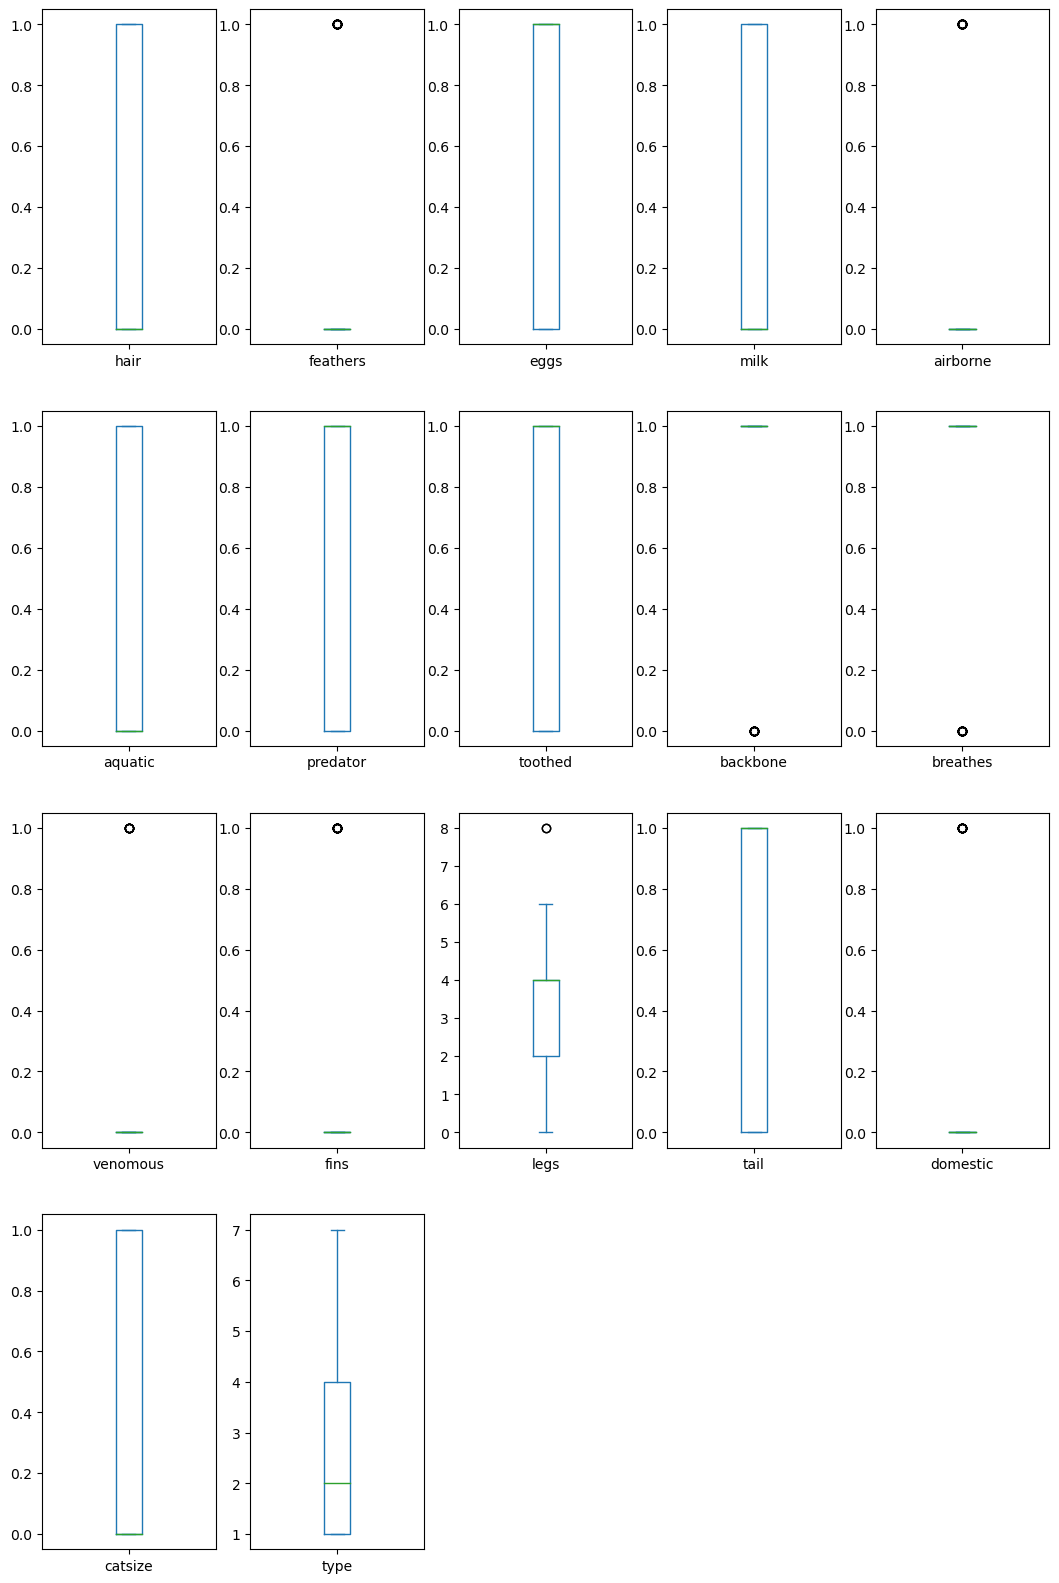

In [125]:
zoo.plot(kind='box', subplots=True, layout=(4,5), figsize=(13,20), sharex=False, sharey=False)
plt.show()

### KNN Model Building

In [179]:
X = zoo.iloc[:, 1:17]
Y = zoo.iloc[:, -1]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [180]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [181]:
model2 = KNeighborsClassifier(n_neighbors = 17)

In [182]:
model2.fit(X,Y)

KNeighborsClassifier(n_neighbors=17)

In [183]:
kfold2 = KFold(n_splits=12)
results2 = cross_val_score(model2, X, Y, cv = kfold2)

In [184]:
results2

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [185]:
results2.mean()

nan

## Grid Search for Algorithm 

In [186]:
n_neighbors2 = list(range(1,40))
parameters2 = {'n_neighbors' : n_neighbors2}

In [187]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator = model2, param_grid = parameters2)
grid2.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [188]:
print(grid2.best_score_)
print(grid2.best_params_)

nan
{'n_neighbors': 1}


### Visualizing the CV results

In [189]:
k_range = range(1,35)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())

In [190]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


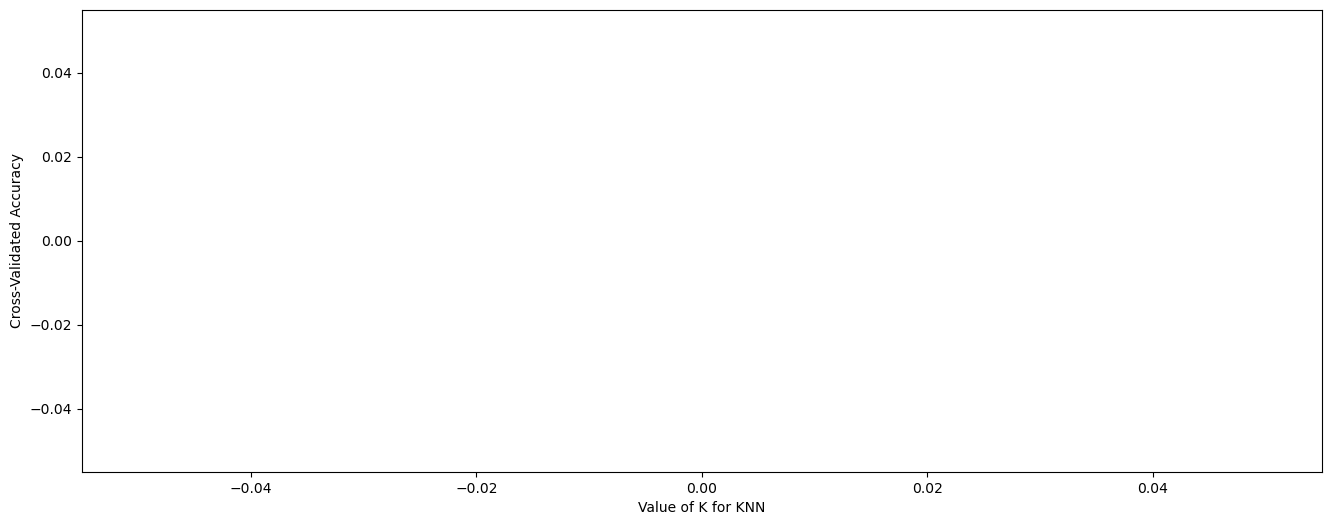

In [191]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [192]:
k_scores

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [193]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,35),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [194]:
zoo_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [195]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
